<a href="https://colab.research.google.com/github/imamslogic/Retail-clothes-business/blob/main/Copy_of_interv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb

In [43]:
# Read the dataset into a dataframe
df1 = pd.read_csv('historic.csv')
# Read the dataset into a dataframe
df2 = pd.read_csv('prediction_input.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


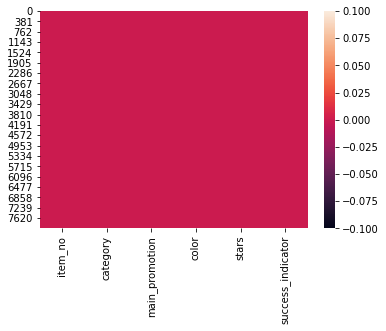

In [44]:
df1.info()
sb.heatmap(df1.isnull())

In [45]:
# Drop all rows with missin data
df1 = df1.dropna()

In [46]:
df1

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,flop
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,786448,Blouse,Category_Highlight,Blue,2.6,flop


In [47]:
df1.isna

<bound method DataFrame.isna of       item_no    category       main_promotion   color  stars success_indicator
0      739157       Tunic              Catalog   Green    3.1              flop
1      591846      Hoodie   Category_Highlight     Red    1.5              flop
2      337574  Sweatshirt              Catalog     Red    4.4               top
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1              flop
4      812151      Hoodie   Category_Highlight   Green    4.1               top
...       ...         ...                  ...     ...    ...               ...
7995   280947     T-Shirt              Catalog    Blue    3.9              flop
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5               top
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0              flop
7998   786448      Blouse   Category_Highlight    Blue    2.6              flop
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9               top

[8000 r

In [48]:
df1.columns

Index(['item_no', 'category', 'main_promotion', 'color', 'stars',
       'success_indicator'],
      dtype='object')

In [49]:
# Seperate the dataframe into X and y data
X = df1[['category', 'main_promotion', 'color', 'stars']].values
y = df1['success_indicator'].values

# Delete the Survived column from X
#X = np.delete(X,1,axis=1)

In [50]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train = enc.transform(X_train).toarray()


In [52]:
X_train = np.array(X_train.nonzero())
X_train = X_train.reshape(1,-1).transpose()

In [53]:
X_train.shape

(44800, 1)

In [54]:
y_train = y_train.reshape(1,-1)
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

In [55]:
#len(y_train)
y_train.shape

(1, 5600)

In [56]:
y_train = y_train.transpose()

In [57]:
X_test = X_test.reshape(1,-1)
enc.fit(X_test)
#y_train = enc.transform(y_train).toarray()

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [58]:
X_test = enc.transform(X_test).toarray()

In [59]:
X_test = X_test.transpose()

In [60]:
y_test = y_test.reshape(1,-1)
enc.fit(y_test)
y_test = enc.transform(y_test).toarray()

In [61]:
y_test = y_test.transpose()

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
if len(X_train) > len(y_train):
  result=np.zeros(X_train.shape)
  result[:y_train.shape[0]] = y_train
  clf.fit(X_train,result)
else:
  result=np.zeros(y_train.shape)
  result[:X_train.shape[0]] = X_train
  clf.fit(result,y_train)

y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [63]:
y_pred = y_pred.reshape(len(y_pred),1)

In [64]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
if len(y_test) > len(y_pred):
  result=np.zeros(y_test.shape)
  result[:y_pred.shape[0]] = y_pred
  print("Accuracy:",metrics.accuracy_score(y_test, result))
else:
  result=np.zeros(y_pred.shape)
  result[:y_test.shape[0]] = y_test
  print("Accuracy:",metrics.accuracy_score(result, y_pred))

Accuracy: 0.75
